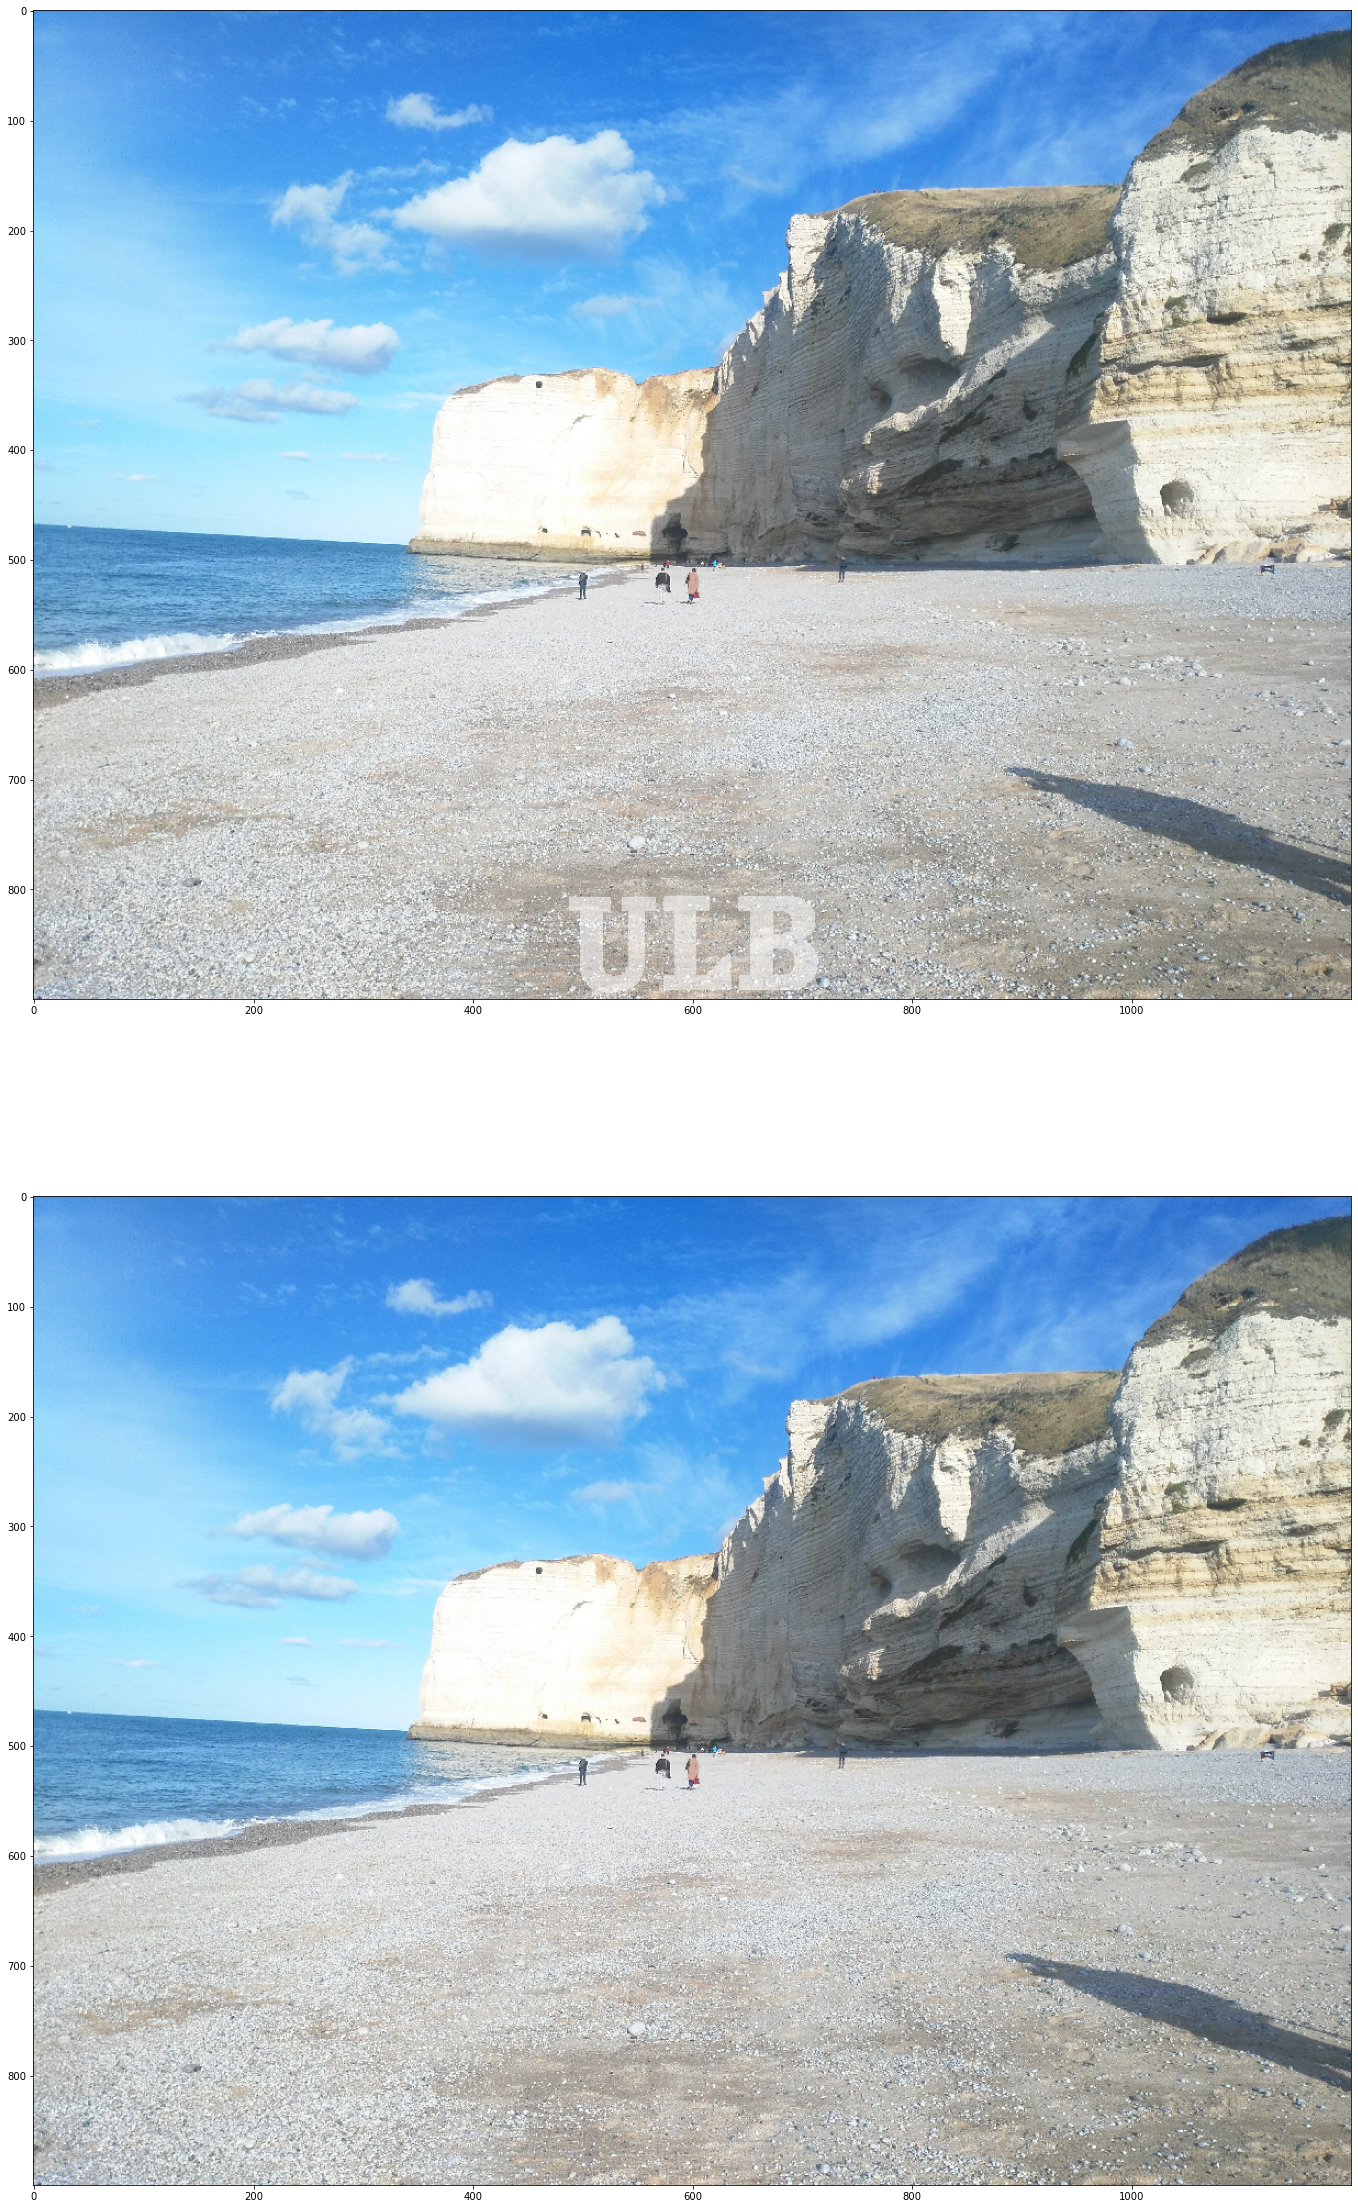

In [1]:
from skimage.io import imread,imsave,imshow
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont
%matplotlib inline 

#Take for argument a text t and a font fnt
#Evaluate the size needed for the watermark to contain the text
def size_of_text(t, f):
    im_for_text_size = Image.new('RGBA', (1, 1), (0,0,0,255))
    d = ImageDraw.Draw(im_for_text_size)
    return d.textsize("{}".format(t), f)

#Take for arguments:  the wanted text, its font and if the user want to save it
#Create a wm from scratch with a wanted text
def create_im_watermak(t, f, save = None):
    s = size_of_text(t, f)
    i = Image.new("RGBA", (s[0], s[1]), (0,0,0,255))
    d = ImageDraw.Draw(i)
    d.text((0, 0), t, font=f, fill=(255,255,255,255))
    if save:
        i.save('{}.png'.format(t))
    return i 

#Take an image and transform it to RGBA
def to_rgba(im):
    if (np.array(im).ndim == 2):
        transparency = np.ones(im.shape)*255
        im_rgba = np.stack((im, im, im, transparency), axis=2).astype('uint8')
    elif (np.array(im).ndim == 3 and np.array(im).shape[2] == 3):
        r = im[:, :, 0]
        g = im[:, :, 1]
        b = im[:, :, 2]
        transparency = np.ones(r.shape)*255
        im_rgba = np.stack((r, g, b, transparency), axis=2).astype('uint8')
    else:
        im_rgba = im
    return im_rgba

#Take the image and the watermark and resize the watermark according to the image dimensions
def resize_watermark(im, wm):
    if (type(wm) != Image.Image):
        wm = Image.fromarray(wm)
    if (im.shape[0] <= im.shape[1]):
        wm = wm.resize((np.array(wm).shape[1]*im.shape[0]//(10*np.array(wm).shape[0]), im.shape[0]//10), Image.NEAREST)
    else:
        wm = wm.resize((im.shape[1]//5, np.array(wm).shape[0]*im.shape[1]//(5*np.array(wm).shape[1])), Image.NEAREST)
    return  np.array(wm)

#Take the image, the watermark and the wanted position either with one of the 10 predetermined positions 
#or with a tuple/liste
def convert_to_coordinates(im, wm, p):
    if (type(p) != str):
        pos = p
    elif (p == 'la'):
        pos = (5, 5)
    elif (p == 'lm'):
        pos = ((im.shape[0]//2)-wm.shape[0]//2, 5)
    elif (p == 'ld'):
        pos = ((im.shape[0]-wm.shape[0]-5), 5)
    elif (p == 'ma'):
        pos = (5, (im.shape[1]//2)-wm.shape[1]//2)
    elif (p == 'mm'):
        pos = ((im.shape[0]//2)-wm.shape[0]//2, (im.shape[1]//2)-wm.shape[1]//2)
    elif (p == 'md'):
        pos = ((im.shape[0]-wm.shape[0]-5), (im.shape[1]//2)-wm.shape[1]//2)
    elif (p == 'ra'):
        pos = (5, (im.shape[1]-wm.shape[1])-5)
    elif (p == 'rm'):
        pos = ((im.shape[0]//2)-wm.shape[0]//2, (im.shape[1]-wm.shape[1])-5)
    elif (p == 'rd'):
        pos = ((im.shape[0]-wm.shape[0])-5, (im.shape[1]-wm.shape[1])-5)
    return pos

#Take for arguments: image RGBA, watermark RGBA, position for the wm and its transparancy
#Transform the image at the given position with the given transparancy
def transform_image(im, wm, pos, trns):
    wm  = resize_watermark(im, wm)
    p = convert_to_coordinates(im, wm, pos)
    for i in range(wm.shape[0]):
        for j in range(wm.shape[1]):
            if(wm[i,j][0]>0):
                im[p[0]+i, p[1]+j][3] = trns
    return im

#Take for arguments: image RGBA, watermark RGBA, position for the wm, its transparancy and the desire to save it or not
#Apply the watermark to the image at the given position with the given transparancy
def apply_watermak(im, wm, pos, trns, file_name = None):
    im = transform_image(im, wm, pos, trns)
    if file_name:
        imsave('{}.png'.format(file_name), im)
    return im

#Take for arguments: image RGBA, watermark RGBA, position for the wm, its transparancy and the desire to save it or not
#Remove the watermark from the image at the given position with the given transparancy
def remove_watermark(im, wm, pos, file_name = None):
    im = transform_image(im, wm, pos, 255)
    if file_name:
        imsave('{}.png'.format(file_name), im)
    return im

#fnt = ImageFont.truetype('/System/Library/Fonts/Supplemental/Arial.ttf', 300) path for font for Mac users
#a sample of 4 font has been implemented with the notebook
fnt = ImageFont.truetype('Arial.ttf', 300)
fnt1 = ImageFont.truetype('Papyrus.ttc', 300)
fnt2 = ImageFont.truetype('Phosphate.ttc', 300)
fnt3 = ImageFont.truetype('Times New Roman.ttf', 300)

im = imread('camera.jpg')
im2 = imread('ex_wm.jpg')
im3 = imread('walking.jpg')
im4 = imread('etretat.jpg')
#im4 = imread('TrainWindowMotionBNWUsineCow.JPG')
#wm = create_im_watermak("Arthur", fnt)
#wm1 = create_im_watermak("Arthur", fnt3)
wm = imread('watermark.png')
im_f = apply_watermak(to_rgba(im4), to_rgba(wm), "md", 120)
im_f1 = remove_watermark(to_rgba(im4), to_rgba(wm), "md")


plt.figure(figsize=(40, 40))
plt.subplot(2, 1, 1)
plt.imshow(im_f)
plt.subplot(2, 1, 2)
plt.imshow(im_f1)
plt.show()